In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import metrics

#import data in jupyter
data=pd.read_csv("DATA.csv")

# Dataset

In [2]:
#observation
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
data.shape #81 variables

(2919, 81)

In [4]:
data.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

# Descriptive analysis and visualization

In [5]:
data2=data.dropna(subset=['SalePrice'])#Drop NA in saleprice 
data2.shape

(1460, 81)

In [6]:
data2['SalePrice'].describe(include='all')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

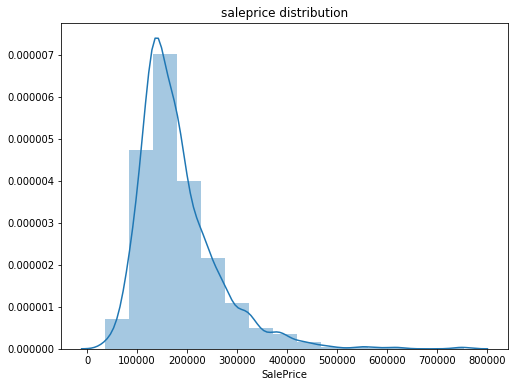

In [7]:
#saleprice 
import seaborn as seabornInstance 
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.title("saleprice distribution")
sns.distplot(data2['SalePrice'],bins=15);



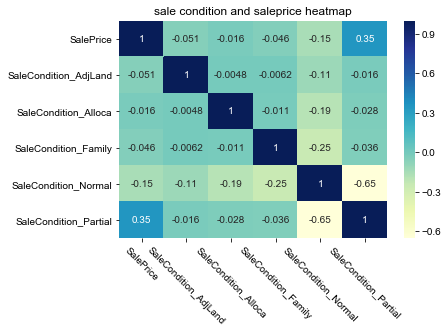

In [8]:
#sale condition and saleprice heatmap 
check=data2[['SaleCondition','SalePrice']]
check2=pd.get_dummies(check,drop_first=1,columns=['SaleCondition'])
corr=check2.corr()
ax=sns.heatmap(corr,annot=True,cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
sns.set_style("darkgrid")
plt.title('sale condition and saleprice heatmap')
pl.xticks(rotation=-45);

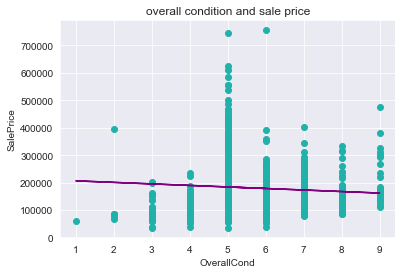

In [9]:

#scatter plot - overall condition - sale price
plt.scatter(data2['OverallCond'],data2['SalePrice'],color = "lightseagreen")
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.title('overall condition and sale price');

#Best fit line
X=data2['OverallCond']
Y=data2['SalePrice']
denominator=X.dot(X)-X.mean()*X.sum()
m=(X.dot(Y)-Y.mean()*X.sum())/denominator
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
fitline=m*X+b
plt.plot(X,fitline,'purple')



# data partition & SLR

In [10]:
#Independent variables:
line_data=data2[['1stFlrSF','2ndFlrSF','SalePrice','OverallQual']]
line_data['totalSF'] = line_data['1stFlrSF'] + line_data['2ndFlrSF']
SLR=line_data[['OverallQual','SalePrice','totalSF']]

C:\Users\hayle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#separate select data to training and test set
from sklearn.model_selection import train_test_split
X = SLR[['OverallQual','totalSF']]
y = SLR['SalePrice']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.4, random_state=666)

In [12]:
#build simple linear regression with trainnig set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
coef_SLR=pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_SLR

,Coefficient
OverallQual,32925.612857
totalSF,60.283570


In [13]:
#tested on the testing data
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
print('score', model.score(X_test,y_test))
print('r2 score', r2_score(y_test,predictions))
print('Average Sqaured Error', mean_squared_error(y_test, predictions))


score 0.6783986018032607
r2 score 0.6783986018032607
Average Sqaured Error 1824408939.2166831


# Extensions

**Correlation map**

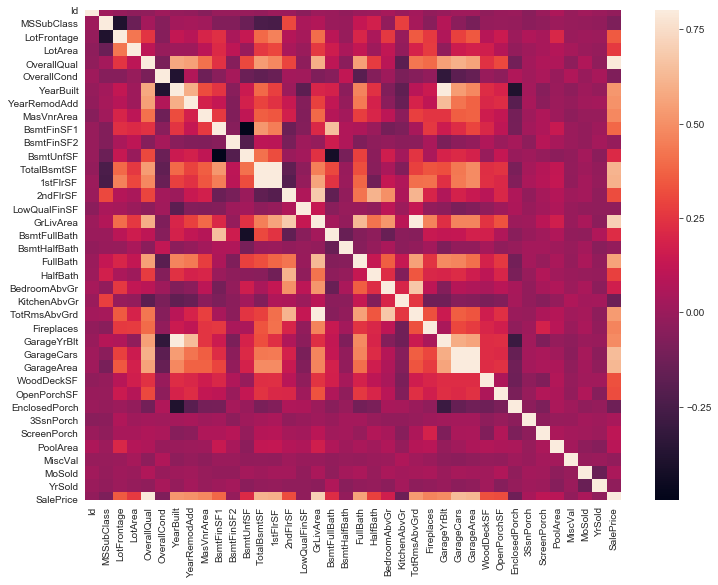

In [14]:
#correlation heatmap with all feature
corrmat = data2.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8);

<function matplotlib.pyplot.show(*args, **kw)>

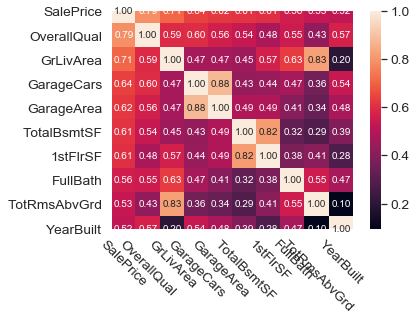

In [15]:
#top 10 Heatmap
k=10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
pl.xticks(rotation=-45)
plt.show
                

In [16]:
#Most correlated feautures
most_correlated_features=pd.DataFrame(cols)
most_correlated_features.columns = ["Most Correlated Features"]
most_correlated_features

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


**Try more variables**

In [17]:
MLR2=data2[['SalePrice','OverallQual','GrLivArea','GarageCars','FullBath','TotRmsAbvGrd','1stFlrSF']]
X2 = MLR2[['OverallQual','GrLivArea','GarageCars','FullBath','TotRmsAbvGrd','1stFlrSF']]
y2 = MLR2['SalePrice']
X_train2, X_test2, y_train2, y_test2 =train_test_split(X2,y2,test_size=0.4, random_state=666)
model2=regressor.fit(X_train2, y_train2)


In [18]:
coef_SLR=pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])
coef_SLR

,Coefficient
OverallQual,26124.720363
GrLivArea,47.566530
GarageCars,16018.858972
FullBath,3316.129318
TotRmsAbvGrd,-2209.658554
1stFlrSF,35.014717


In [19]:
predictions2 = model2.predict(X_test2)
print('score', model.score(X_test2,y_test2))
print('r2 score', r2_score(y_test2,predictions2))
print('Average Sqaured Error', mean_squared_error(y_test2, predictions2))

score 0.7233816620334339
r2 score 0.7233816620334339
Average Sqaured Error 1569225044.938196


**APP to predict price**

In [20]:
#APP to predict 
OverallQuality= int(input("Which Quality you want to livein choose:1 -10 "))
GrLivArea= int(input("Above ground living area you expected: in square feet"))
GarageCars = int(input("GarageCars: Size of garage in car capacity: choose:0-5 "))
FullBath=int(input("Full bathrooms above grade: choose:0-5 "))
TotRmsAbvGrd=int(input("Total rooms above grade (does not include bathrooms):choose 2-15"))
firstFlrSF= int(input("First Floor square feet you expected:"))
price=26124.720363*OverallQuality+47.566530*GrLivArea+16018.858972*GarageCars+3316.129318*FullBath-TotRmsAbvGrd*2209.658554+firstFlrSF*35.014717

print("According to your choice, the model predicts the price is : ",price)

Which Quality you want to livein choose:1 -10 5
Above ground living area you expected: in square feet200
GarageCars: Size of garage in car capacity: choose:0-5 1
Full bathrooms above grade: choose:0-5 2
Total rooms above grade (does not include bathrooms):choose 2-152
First Floor square feet you expected:200
According to your choice, the model predicts the price is :  165371.651715
